In [1]:
# Final Project
# Brian Yi, Mahesh Annapureddy

In [2]:
# ipyplubish: ipynb to latex to pdf converter
# !nbpublish -pdf -lb -pbug report_code.ipynb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from itertools import chain
from ipypublish import nb_setup

In [4]:
# Visualize all columns/rows
pd.options.display.max_columns = 60
pd.options.display.max_rows = 70

# Import and Data Processing

For this project, we use NumPy and Pandas modules to import, process, and transform the raw image data into usable information for model training. The figue below is an example of the raw digit data (left) along with the converted image (right) created through our convert() method; we use the same convert() method to translate the face data as well. We choose to equate '#' and '+' pixels with a value of 1 and empty pixels with a value of 0. We store most of our data in Pandas Series and DataFrame structures along with Python's native list structure.

## Digit Data

In [5]:
train_img_d_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/digitdata/trainingimages",
                              skip_blank_lines=False, squeeze=True, header=None)
train_lbl_d_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/digitdata/traininglabels",
                              skip_blank_lines=False, header=None)
test_img_d_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/digitdata/testimages",
                              skip_blank_lines=False, squeeze=True, header=None)
test_lbl_d_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/digitdata/testlabels",
                              skip_blank_lines=False, header=None)

In [6]:
print(train_img_d_raw.shape, train_lbl_d_raw.shape)
print(test_img_d_raw.shape, test_lbl_d_raw.shape)

(140000,) (5000, 1)
(28000,) (1000, 1)


In [7]:
# Visualization of before and after conversion for first digit of raw digit data
before = train_img_d_raw[0:28]

converted = before.copy()
for i in range(converted.shape[0]):
    converted[i] = converted[i].replace(' ', '0')
    converted[i] = converted[i].replace('#', '1')
    converted[i] = converted[i].replace('+', '1')

before = pd.DataFrame(before)
converted = pd.DataFrame(converted)
pd.concat([before, converted], axis=1).values

array([['                            ', '0000000000000000000000000000'],
       ['                            ', '0000000000000000000000000000'],
       ['                            ', '0000000000000000000000000000'],
       ['                            ', '0000000000000000000000000000'],
       ['                            ', '0000000000000000000000000000'],
       ['                +++++##+    ', '0000000000000000111111110000'],
       ['        +++++######+###+    ', '0000000011111111111111110000'],
       ['       +##########+++++     ', '0000000111111111111111100000'],
       ['        #######+##          ', '0000000011111111110000000000'],
       ['        +++###  ++          ', '0000000011111100110000000000'],
       ['           +#+              ', '0000000000011100000000000000'],
       ['           +#+              ', '0000000000011100000000000000'],
       ['            +#+             ', '0000000000001110000000000000'],
       ['            +##++           ', '0000000000

In [8]:
# Method to convert all the image data into array full of 0s and 1s
def convert(data):
    converted = data.copy()
    for i in range(converted.shape[0]):
        converted[i] = converted[i].replace(' ', '0')
        converted[i] = converted[i].replace('#', '1')
        converted[i] = converted[i].replace('+', '1')
    converted = converted.apply(lambda x: pd.Series(list(x)))
    converted = converted.apply(pd.to_numeric)
    return converted

In [9]:
# Converting all raw data
train_img_d = convert(train_img_d_raw)
test_img_d = convert(test_img_d_raw)

In [10]:
# Visualization of first digit of converted digit data
train_img_d[0:28]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0
6,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
7,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0


## Face Data

In [11]:
train_img_f_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/facedata/facedatatrain",
                              skip_blank_lines=False, squeeze=True, header=None)
train_lbl_f_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/facedata/facedatatrainlabels",
                              skip_blank_lines=False, header=None)
test_img_f_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/facedata/facedatatest",
                              skip_blank_lines=False, squeeze=True, header=None)
test_lbl_f_raw = pd.read_csv("C:/Users/rvrma/Documents/1st semester/Artificial Intelligence/Project/facedata/facedatatestlabels",
                              skip_blank_lines=False, header=None)

In [12]:
print(train_img_f_raw.shape, train_lbl_f_raw.shape)
print(test_img_f_raw.shape, test_lbl_f_raw.shape)

(31570,) (451, 1)
(10500,) (150, 1)


In [13]:
# Visualization of first digit of raw digit data
train_img_f_raw[0:70]

0                                                   ...
1                                                   ...
2                                  ###              ...
3                               ###   ###           ...
4                             ##         ####       ...
5                           ##               ###    ...
6                          #                    ### ...
7                         #                        #...
8                         #                         ...
9                     #   #                         ...
10                   #   #                          ...
11                  #    #          ##              ...
12                  #    #         #  #             ...
13                 #     #    #    #   ###          ...
14                 #     #   #     #  #   #         ...
15                #      # ##      #  #   #         ...
16                #       #       #        #        ...
17               #                #   #    #    

In [14]:
# Converting all raw data
train_img_f = convert(train_img_f_raw)
test_img_f = convert(test_img_f_raw)

In [16]:
# Visualization of first digit of converted digit data
train_img_f[0:70]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0


# Naive Bayes Model

## Algorithm

For our Naive Bayes model, we predict the classification of an image through the following Naive Bayes assumption: $P(Class|Data)  = \frac{P(Data|Class)P(Class)}{P(Data)}$. For each test observation, we calculate $P(Class|Data)$ for each possible class and choose the class with the highest probability as our prediction. When estimating for $P(Class|Data)$, we can focus on evaluating $P(Data|Class)P(Class)$ and ignore $P(Data)$ because $P(Data)$ remains the same for each test observation. $P(Class)$ is the probability that a certain class appears in a data set and $P(Data|Class)$ is the probability that a certain feature value appears within a certain class. Since we are calculating $P(Data|Class)$ through discrete methodology, there may be many values for a particular feature that do not appear even once in a class; this causes $P(Data|Class) = 0$ and messes up our estimation of $P(Class|Data)$. As such, we employ a smoothing method over our model parameters such that any $P(Data|Class)$ that equal zero are assigned a very small value of $1 \times 10^{-10}$.

## Method

We use four methods to train and test our Naive Bayes model, partition(), feature_ext(), train_nb(), and test_nb(). First consider the converted digit images that consist of 0s and 1s. Partition() divides this single image of 0s and 1s into its features and returns these features as an array. Feature_ext() takes these arrays of features returned from partition() and aggregates how often each feature value appears for each feature. Feature_ext() returns a dataframe where the columns represent unique features and the rows represent the total counts for feature values. From here on, it is a simple matter to calculate $P(Data|Class)$ from the dataframe by dividing each feature value aggregate count by the number of observations in that class. After we have $P(Class)$ and $P(Data|Class)$ for all unique classes, we find the class with the highest $P(Class)P(Data|Class)$ value and return that as our prediction. We use the same training and testing method for both digit and face classification since our method is robust in feature input and adjusts the feature selection algorithm accordingly.

In [15]:
# Creates an array where each row contains the feature values for one image observation.
def partition(data, feat_size, wid_feat_num, ht_feat_num):
    features = [[0 for col in range(wid_feat_num)] for row in range(ht_feat_num)]
    
    for row in range(ht_feat_num):
        for col in range(wid_feat_num):
            for mat_row in range(feat_size):
                for mat_col in range(feat_size):
                    features[row][col] += data[mat_row + row*feat_size][mat_col + col*feat_size]
    return features

In [16]:
# Creates dataframe that counts how often each feature value appears in the data
def feature_ext(data, feat_size, wid_feat_num, ht_feat_num):
    img_ht = int(feat_size*ht_feat_num)
    features = [[0 for col in range(int(wid_feat_num*ht_feat_num))]
                for row in range(int(len(data)/img_ht))]
    
    for classif in range(int(len(data)/img_ht)):
        tmp = partition(data[0 + img_ht*classif:img_ht + img_ht*classif],
                         feat_size, wid_feat_num, ht_feat_num)
        count = 0
        for row in range(ht_feat_num):
            for col in range(wid_feat_num):
                features[classif][count] = tmp[row][col]
                count += 1    
    return features

In [17]:
# Training method for Naive Bayes model
def train_nb(train_data, train_lbl, class_num, feat_size, wid_feat_num, ht_feat_num, split, seed):
    start = time.time()
    
    # Parameters
    obs_num = int(train_lbl.shape[0]*split)
    img_wid = int(train_data.shape[1])
    img_ht = int(train_data.shape[0] / train_lbl.shape[0])
    feature_num = int(wid_feat_num*ht_feat_num)
    
    # Random sample of training set
    random.seed(seed)
    sample_num = random.sample(range(train_lbl.shape[0]), obs_num)
    sample_range = []
    sample_data = train_data.copy()

    for obs in sample_num:
        a = 0
        b = img_ht
        a = a + img_ht*obs
        b = b + img_ht*obs
        sample_range.append(range(a, b))
    sample_range = list(chain(*sample_range))
    sample_data = sample_data.iloc[sample_range].reset_index(drop=True).values.tolist()

    # Extracting features
    features = pd.DataFrame(feature_ext(sample_data, feat_size, wid_feat_num, ht_feat_num))

    # Add training labels to feature set
    tmp = train_lbl.iloc[sample_num].reset_index(drop=True)
    tmp.rename(columns={0:feature_num}, inplace=True)
    features = pd.concat([features, tmp], axis=1)

    # P(Class)
    """Find all value counts of each unique class and divide by the total number of observations."""
    p_class = features.iloc[:, -1].value_counts()
    p_class.sort_index(inplace=True)
    p_class = p_class/obs_num

    # P(Data | Class)
    """Use the features dataframe (df) extracted earlier where each row of the df contains feature values
       for that particular observation. Convert this features df to a dataframe that contains contains all
       feature values and the number of times each feature value appears in the training set. Then calculate
       the probability that certain feature values appear per class for P(Data | Class).
    """
    p_data_class_total = []
    
    for classif in range(class_num):
        p_data_class = pd.DataFrame([[0 for col in range(feature_num)] for row in range(feat_size**2 + 1)])
        for feature in range(feature_num):           
            
            # Finds the unique feature values per class and inserts into our future P(Data | Class) df
            tmp = features.loc[features.iloc[:,-1] == classif][feature].value_counts()    
            for feature_val in tmp.index:
                p_data_class[feature][feature_val] = tmp[feature_val]
        
        # Convert number of feature values into probability
        p_data_class = p_data_class / features.iloc[:, -1].value_counts().sort_index()[classif]
        
        p_data_class.columns = pd.MultiIndex.from_product([[classif], range(feature_num)], names=['Digit', 'Feature'])
        if classif == 0:
            p_data_class_total = p_data_class
        else:
            p_data_class_total = p_data_class_total.join(p_data_class)
    p_data_class = p_data_class_total
    
    end = time.time()
    performance = end - start
    
    return p_class, p_data_class, performance

In [18]:
# Testing method for Naive Bayes model
def test_nb(test_data, test_lbl, class_num, feat_size, wid_feat_num, ht_feat_num, p_class, p_data_class):
    start = time.time()
    
    # Parameters
    obs_num = test_lbl.shape[0]
    feature_num = int(wid_feat_num*ht_feat_num)
    img_ht = int(test_data.shape[0] / test_lbl.shape[0])
    
    # Extracting features
    tmp = test_data.copy().values.tolist()
    observation = feature_ext(tmp, feat_size, wid_feat_num, ht_feat_num)
    
    # Replace when class probabilities are 0 with a small value to avoid P(Data | Class) = 0
    p_data_class = p_data_class.replace(0, 0.0000000001)
    
    # Calculates the probabilities of each class for each test observation
    total_correct = 0
    for obs, num in zip(observation, range(obs_num)):
        prob_f = []
        correct = 1
        for classif in range(class_num):
            tmp = p_data_class.iloc[:, p_data_class.columns.get_level_values(0)==classif]
            prob = []
            
            # P(Class | Data) = P(Data | Class) * P(Class)
            for feat in range(feature_num):
                prob.append(tmp.iloc[:, feat][obs[feat]])
            prob_f.append(np.prod(prob)*p_class[classif])
        
        # Checks if prediction matches image class
        if test_lbl[0][num] == prob_f.index(max(prob_f)):
            correct = True
            total_correct += 1
        else:
            correct = False
    end = time.time()
    
#     print('Total classified correct:', total_correct/obs_num)
#     print('Time:', end - start)
    
    performance = end - start
    perc_correct = total_correct / obs_num
    
    return perc_correct, performance

## Digit Classification

We will first look at our model's performance on digit classification for digits 0 through 9. Our feature selection is obtained by dividing a digit image into n x n dimension partitions such that the sum of colored pixels (1s) within a partition is considered as one feature. Since each digit image is 28 x 28 pixels, we initially divided digits into 7 x 7 partitions for a total of 16 features per digit. Training this model using 100% of the training set, we got an accuracy of 63.8%. Being a ways off from the 70% cutoff, we decided to narrow the size of each feature to a 4 x 4 partition for a new total of 49 features. By creating smaller partitions, our features become more precise in capturing the nuances that differ between each digit. This turned out to be the better choice and increased our model's overall accuracy from 63.8% to 74.7% when using the entire training set. 

Table 2.1 shows the accuracy and time it takes to train and test our model using various divisions of our training set over 5 iterations. The accuracy of our model steadily improves the greater the percentage of the training set is used; this trend makes sense since the more data our model has on various ways to draw each digit, the more accurate our model becomes when predicting any new test observation. Note that as more training data is used, the standard deviation of accuracy measurements decrease over time as well. This decreased variation in accuracy makes sense since larger training sets lead to a lesser chance of any one iteration containing biased data that can skew the mean accuracy. With regards to time efficiency, graph shows a clear upwards trend indicating that our model takes longer to train when more training data is used. Note that even though training time increases with respect to training data, the total time spent on training and testing our model is relatively consistent. This is because the majority of the total time is spent testing data as opposed to training due to method design. Even though the amount of training data varies throughout our testing, the test data remains the same at 1000 observations every time.

In [86]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
train_time = []
test_time = []
total_time = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    train_time_tmp = []
    test_time_tmp = []
    total_time_tmp = []
    
    for j in range(5):
        p_class, p_data_class, train_perf = train_nb(train_img_d, train_lbl_d_raw, 10, 4, 7, 7, train_split, j)
        perc_correct, test_perf = test_nb(test_img_d, test_lbl_d_raw, 10, 4, 7, 7, p_class, p_data_class)
        
        acc_tmp.append(perc_correct)
        train_time_tmp.append(train_perf)
        test_time_tmp.append(test_perf)
        total_time_tmp.append(train_perf + test_perf)
        if train_split == 1.0:
            break
            
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    train_time.append(round(np.mean(np.array(train_time_tmp)), 2))
    test_time.append(round(np.mean(np.array(test_time_tmp)), 2))
    total_time.append(round(np.mean(np.array(total_time_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, train_time, test_time, total_time)),
                  columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)',
                             'Training Time (sec)', 'Testing Time (sec)', 'Total Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Training Time (sec),Testing Time (sec),Total Time (sec)
Training,,,,,
10%,58.60,1.77,2.87,111.61,114.49
20%,65.12,1.85,5.37,144.22,149.58
30%,69.28,0.99,6.34,214.24,220.58
40%,71.06,1.08,9.02,224.34,233.36
50%,72.58,0.98,9.09,206.67,215.75
60%,73.14,0.63,10.62,267.15,277.77
70%,73.94,0.69,13.26,289.50,302.75
80%,73.80,0.43,12.93,221.92,234.85
90%,74.46,0.47,11.64,224.00,235.65


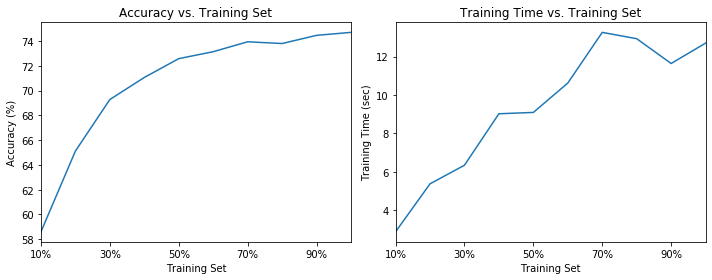

In [87]:
df_acc = df.iloc[:, 0]
df_time = df.iloc[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
df_acc.plot(ax = ax[0]) 
ax[0].set(title='Accuracy vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Accuracy (%)')

df_time.plot(ax = ax[1])
ax[1].set(title='Training Time vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Training Time (sec)')
plt.tight_layout();

## Face Classification

For face classification, our goal is to determine whether any observation is an image of a human face. Our feature selection is similar to that of digit classification in that we divided a face image into n x n dimension partitions such that the sum of colored pixels (1s) within a partition is considered as one feature. Since each face image is 60 x 70 (width x height) pixels, we divided the image into 2 x 2 partitions for a total of 1050 features. Using 100% of the training set, we immediately got an accuracy of 68.7%. For a Naive Bayes model, we felt that this accuracy, being 1% off 70%, was sufficient in predicting our face data. Figure 2.2 shows the accuracy and time it takes to train and test our model using various divisions of our training set over five iterations. Like our Naive Bayes model for digit classification, the accuracy of this model increases while the standard deviation decreases as more of the training set is used to train our model. The time it takes to train our model also follows an upward trend as more training data is used as well. Overall, face classification model follows the same characteristics as the digit model for accuracy and training time.

In [103]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
train_time = []
test_time = []
total_time = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    train_time_tmp = []
    test_time_tmp = []
    total_time_tmp = []
    
    for j in range(5):
        p_class, p_data_class, train_perf = train_nb(train_img_f, train_lbl_f_raw, 2, 2, 30, 35, train_split, j)
        perc_correct, test_perf = test_nb(test_img_f, test_lbl_f_raw, 2, 2, 30, 35, p_class, p_data_class)
        
        acc_tmp.append(perc_correct)
        train_time_tmp.append(train_perf)
        test_time_tmp.append(test_perf)
        total_time_tmp.append(train_perf + test_perf)
        if train_split == 1.0:
            break
        
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    train_time.append(round(np.mean(np.array(train_time_tmp)), 2))
    test_time.append(round(np.mean(np.array(test_time_tmp)), 2))
    total_time.append(round(np.mean(np.array(total_time_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, train_time, test_time, total_time)),
                  columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)',
                             'Training Time (sec)', 'Testing Time (sec)', 'Total Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Training Time (sec),Testing Time (sec),Total Time (sec)
Training,,,,,
10%,51.07,0.68,4.73,27.64,32.37
20%,59.20,1.29,4.69,27.00,31.69
30%,63.73,1.50,4.97,27.22,32.18
40%,66.67,0.73,4.34,23.29,27.63
50%,66.93,1.37,4.90,23.59,28.49
60%,67.73,2.09,5.92,24.27,30.19
70%,68.40,0.80,6.32,23.98,30.30
80%,68.53,0.65,6.59,23.88,30.46
90%,68.93,0.33,7.01,23.83,30.84


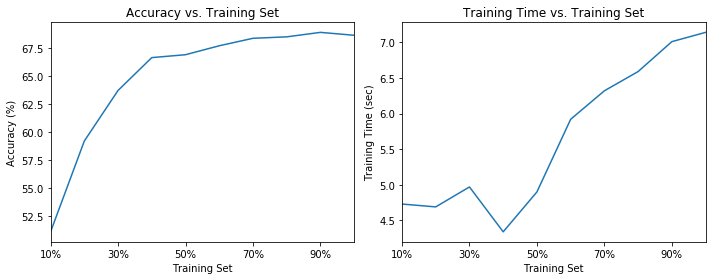

In [120]:
df_acc = df.iloc[:, 0]
df_time = df.iloc[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
df_acc.plot(ax = ax[0]) 
ax[0].set(title='Accuracy vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Accuracy (%)')

df_time.plot(ax = ax[1])
ax[1].set(title='Training Time vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Training Time (sec)')
plt.tight_layout();

# Perceptron Model

## Algorithm

The perceptron is a single layer neural network and is a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.   
For our perceptron model, we predict the classification of an image using the following method:     

- We extract features from the training dataset and store them in the features data set ${\phi}(x)$.
- Initialize the weights ${\{w_j\}}$; they may be initialized to $0$.
- Now for each data point i.e, image , $(x_i,y_i)$ in our training dataset:
    * For each class label $y^j$, calculate $f(x_i,w)$ = $w_0$ + $w_1{\phi}_1(x_i)$ + $w_2{\phi}_2(x_i)$ + $w_3{\phi}_3(x_i)$ + . . . + $w_l{\phi}_l(x_i)$.
    * We find the class label $y^j$ with the highest $f(x_i,w)$ value.
        * If $y^j$=$y_i$, then nothing needs to be done and we move to the next example $(x_{i+1},y_{i+1})$.
        * Else, update the weights $\{w_{y_i},w_{y^j}\}$:   
            * For $y_i$ class label, $w_{y_i}$ = $w_{y_i}$  +  $\phi(x_i)$
            * For $y^j$ class label, $w_{y^j}$ = $w_{y^j}$  -  $\phi(x_i)$
    * Now we perform the above training $3$ times i.e $3$ times on our training dataset.
- After performing training method we return the final weights of each class label. Now using these weights, we calculate the $f(x_i,w)$ values of each image or data point of our test dataset and predicts the $y_i$ as the class label with highest $f(x_i,w)$.

## Method

We use four methods to train and test our perceptron model, partition(), feature_ext(), return_high_label(), train_perceptron(), and test_perceptron(). The partition() and feature_ext() methods are the same exact methods used for our Naive Bayes model. We have an additional method, return_high_label(), to return the class label with the highest$f(x_i,w)$ value. Our train_perceptron() method trains our model and returns the time taken to train and compute weights for various training sets. With the help of test_perceptron() method, we can compute the accuracy of our trained perceptron model and return the time taken to test the dataset. We use the same training and testing method for both digit and face classification since our method is robust in feature input and adjusts the feature selection algorithm accordingly.

In [19]:
# Method to return label which has highest activation value
def return_high_label(vector):
    values = [x[0] for x in vector]
    maxIndex = values.index(max(values))
    #print(maxIndex)
    return maxIndex

In [20]:
# Perceptron Model add here
#Training method for perceptron  Model
def train_perceptron(train_data, train_lbl, class_num, feat_size, wid_feat_num, ht_feat_num, split, seed):
    start = time.time()
    
    # Parameters
    obs_num = int(train_lbl.shape[0]*split)
    img_wid = int(train_data.shape[1])
    img_ht = int(train_data.shape[0] / train_lbl.shape[0])
    feature_num = int(wid_feat_num*ht_feat_num)
    
    # Random sample of training set
    random.seed(seed)
    sample_num = random.sample(range(train_lbl.shape[0]), obs_num)
    sample_range = []
    sample_data = train_data.copy()

    for obs in sample_num:
        a = 0
        b = img_ht
        a = a + img_ht*obs
        b = b + img_ht*obs
        sample_range.append(range(a, b))
    sample_range = list(chain(*sample_range))
    sample_data = sample_data.iloc[sample_range].reset_index(drop=True).values.tolist()
    
    # Extracting features
    features = feature_ext(sample_data, feat_size, wid_feat_num, ht_feat_num)
    #print(features[4999][783])
    # Add training labels to feature set
    tmp = train_lbl.iloc[sample_num].reset_index(drop=True)
    tmp1=tmp.to_numpy()
    #print(tmp1[0:10])
    #tmp.rename(columns={0:feature_num}, inplace=True)
    #features = pd.concat([features, tmp], axis=1)
    #print(features)
    #print(features[0:3][450:785])
    #print(features[784])

    #print(feature_num)
    weights = np.zeros((class_num,feature_num))  # intializing weights
    vectors = np.zeros((class_num,1))            # intializing vectors
    error=0
    for k in range(3):
        error=0
        for i in range(obs_num):
            for j in range(class_num):
                vectors[j]=sum(features[i]*weights[j])
                #print(vectors[0])
            predicted_label=return_high_label(vectors)
            #print(predicted_label,temp[i][0])
            # Updating weights
            if predicted_label!=tmp1[i][0] :
                weights[int(predicted_label)]=weights[int(predicted_label)]-features[i]
                weights[tmp1[i][0]]=weights[tmp1[i][0]]+features[i]
                error=error+1
                #print(error)
        #print(error)
     
    end = time.time()
    performance = end - start
    
    return weights,performance

In [21]:
# Testing method for perceptron
def test_perceptron(test_data, test_lbl, class_num, feat_size, wid_feat_num, ht_feat_num, weights):
    start = time.time()
    
    # Parameters
    obs_num = test_lbl.shape[0]
    feature_num = int(wid_feat_num*ht_feat_num)
    img_ht = int(test_data.shape[0] / test_lbl.shape[0])
    
    # Extracting features
    tmp = test_data.copy().values.tolist()
    observation = feature_ext(tmp, feat_size, wid_feat_num, ht_feat_num)
    
    vectors = np.zeros((class_num,1))     # intializing vectors
    total_correct=0
    for i in range(obs_num):
        for j in range(class_num):
            vectors[j]=sum(observation[i]*weights[j])
        predicted_label=return_high_label(vectors)
        if predicted_label==test_lbl[0][i] :
            total_correct=total_correct+1
    #print(total_correct)
    end = time.time() 
    
    performance = end - start
    perc_correct = total_correct / obs_num
    #print(perc_correct)
    return perc_correct,performance

## Digit Classification

We will first look at our model’s performance on digit classification for digits of 0 through 9. Our feature selection follows the same format as Naive Bayes by dividing a digit image into n x n dimension partitions such that the sum of colored pixels (1s) within a partition is considered as one feature. Since each digit image is 28 x 28, we divide the images into 7 x 7 partitions for a total of 16 features similar to our Naive Bayes classification. Unfortunately, using 100% of the training set, we got an accuracy of 52.74%. As such, we decided to narrow the size of each feature to a 4 x 4 for a total of 49 features, and improved our accuracy to 76.32%. Finally, we used 1 x 1 partitions for a total of 784 as features to get an accuracy of 80.40% using the 100% training dataset. This turned out to be the best out of our feature testing, and increased our model’s overall accuracy from 52.74% to 80.40%.

Table 3.1 shows the accuracy and time it takes to train and test our model for various divisions of our training set. As you can see from the graph below, both training time and accuracy strictly increase with the increase in the number of training images. There is a slight dip in accuracy when using 50% of training data, which is clearly explained by the spike in standard deviation of the accuracy measurement at 50%. After 50% of training data, the accuracy is on an upwards trend before peaking at the highest accuracy percentage at 80.40% when using the 100% of the training data. We trained our model for 3 iterations over the digit image set because if we increase the number of iterations, overfitting problem arises and accuracy begins to decrease. Our training time has a very steady upward increase as we feed more data into the model.  

In [79]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
train_time = []
test_time = []
total_time = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    train_time_tmp = []
    test_time_tmp = []
    total_time_tmp = []
    
    for j in range(5):
        weights, train_perf = train_perceptron(train_img_d, train_lbl_d_raw, 10, 1, 28, 28, train_split, j)
        perc_correct, test_perf = test_perceptron(test_img_d, test_lbl_d_raw, 10, 1, 28, 28, weights)
        
        acc_tmp.append(perc_correct)
        train_time_tmp.append(train_perf)
        test_time_tmp.append(test_perf)
        total_time_tmp.append(train_perf + test_perf)
        
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    train_time.append(round(np.mean(np.array(train_time_tmp)), 2))
    test_time.append(round(np.mean(np.array(test_time_tmp)), 2))
    total_time.append(round(np.mean(np.array(total_time_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, train_time, test_time, total_time)),
                  columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)',
                             'Training Time (sec)', 'Testing Time (sec)', 'Total Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Training Time (sec),Testing Time (sec),Total Time (sec)
Training,,,,,
10%,68.28,3.86,2.63,2.14,4.77
20%,74.18,4.38,5.98,2.56,8.53
30%,75.96,0.79,8.31,2.39,10.70
40%,78.16,1.71,11.03,2.47,13.50
50%,76.30,3.76,14.20,2.42,16.62
60%,77.26,2.67,16.52,2.37,18.89
70%,77.04,1.23,19.02,2.25,21.27
80%,77.66,2.04,20.73,2.29,23.02
90%,79.34,1.73,26.59,2.46,29.05


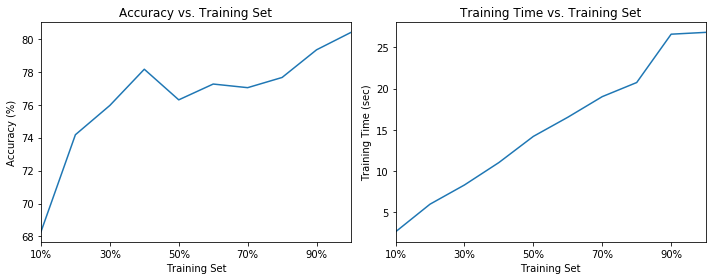

In [80]:
df_acc = df.iloc[:, 0]
df_time = df.iloc[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
df_acc.plot(ax = ax[0]) 
ax[0].set(title='Accuracy vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Accuracy (%)')

df_time.plot(ax = ax[1])
ax[1].set(title='Training Time vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Training Time (sec)')
plt.tight_layout();

## Face Classification

For face classification, our goal is to determine whether an image is a face or not. Our feature selection is similar to that of digit classification in that we divide a face image into n x n dimension partitions such that the sum of colored pixels (1s) within a partition is considered as one feature. Since each face image is 60 x 70 (width x height), we divided the image into 1 x 1 partitions(each pixel as a feature) for a total of 4200 features; using the full training set, we got an accuracy of 87.20%. We experimented with another set of features i.e 2 x 2 partitions for a total of 1050 features and got an accuracy of 89.47% using the 100% training dataset.

Table 3.2 shows the accuracy and time it takes to train and test our model for various divisions of our training set. Like our perceptron model for digit classification, the accuracy and training time increases with the increase in the number of training images. Again note that the unexpected dip in accuracy at 50% is a product of the high standard deviation of 5.10% for the mean accuracy for that measurement. After, the dip when using 50% of the training data, the accuracy increases much more consistently before reaching the max accuracy at 89.47%. We agin trained our model for 3 iterations over the digit image set to avoid overfitting. The time efficiency is strictly increasing with the increase in the size of training dataset. Again, our training time has a very steady upward increase as we feed more data into the model.  

In [58]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
train_time = []
test_time = []
total_time = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    train_time_tmp = []
    test_time_tmp = []
    total_time_tmp = []
    
    for j in range(5):
        weights, train_perf = train_perceptron(train_img_f, train_lbl_f_raw, 2, 2, 30, 35, train_split, j)
        perc_correct, test_perf = test_perceptron(test_img_f, test_lbl_f_raw, 2, 2, 30, 35, weights)
        
        acc_tmp.append(perc_correct)
        train_time_tmp.append(train_perf)
        test_time_tmp.append(test_perf)
        total_time_tmp.append(train_perf + test_perf)
        
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    train_time.append(round(np.mean(np.array(train_time_tmp)), 2))
    test_time.append(round(np.mean(np.array(test_time_tmp)), 2))
    total_time.append(round(np.mean(np.array(total_time_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, train_time, test_time, total_time)),
                  columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)',
                             'Training Time (sec)', 'Testing Time (sec)', 'Total Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Training Time (sec),Testing Time (sec),Total Time (sec)
Training,,,,,
10%,66.00,6.76,0.21,0.39,0.60
20%,80.67,6.23,0.38,0.40,0.78
30%,81.33,4.15,0.46,0.39,0.85
40%,86.27,2.82,0.60,0.38,0.98
50%,85.20,5.10,0.75,0.38,1.14
60%,87.47,3.19,0.88,0.39,1.27
70%,88.27,2.59,1.12,0.40,1.52
80%,88.27,1.24,1.37,0.45,1.82
90%,87.60,3.64,1.57,0.45,2.02


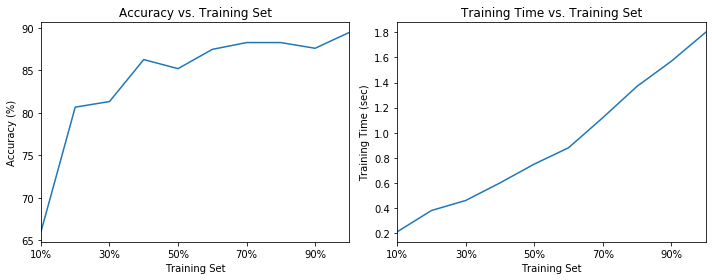

In [75]:
df_acc = df.iloc[:, 0]
df_time = df.iloc[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
df_acc.plot(ax = ax[0]) 
ax[0].set(title='Accuracy vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Accuracy (%)')

df_time.plot(ax = ax[1])
ax[1].set(title='Training Time vs. Training Set',
          xlabel= 'Training Set',
          ylabel= 'Training Time (sec)')
plt.tight_layout();

# KNN Model

## Algorithm

For our third model, we chose to use the K-Nearest Neighbor (KNN) model to predict the classification of an image. KNN is also a form of supervised learning where the model is trained on a data set with labels. KNN predicts the class of an observation by finding the K nearest neighbors to that observation by a designated "distance" metric. The distance metric for our model will be the sum of the difference in pixels between two images. Consider two different images of the digit 3 that have been converted into 0s and 1s. We then subtract one matrix from the other, take the squared value to avoid negative values, and sum up all the remaining 1s as our final distance value. In the ideal case that any two images are identical, the distance between the two images would be zero. Our K nearest neighbors will be the K images that have the smallest distance with respect to our test image. Of these K nearest neighbors, we will select the majority class as our final prediction for that observation. Usually, an odd number K is selected for a model with an even number of classes. Since both our digit and image data have an even number of classes of 10 and 2 respectively, we chose K=7 as our model parameter. 

## Method

The methodology for KNN is much simpler than that of our previous models. Consider one single test observation. If we had to find the K=7 nearest neighbors to this test observation by our distance metric, we need to find the distance between this test image and every image in the training set. Since KNN is instance-based learning, our training/testing procedure is wrapped up in one method that finds the distance between any test image and all the training images; it then chooses the majority class of the K classes with the smallest distance. Note that since a tie is much more likely to occur in this case between the majority class prediction compared to our earlier models, our model handles tie breakers through Python's list's inherent ordering by sorting our 7 nearest neighbors and then selecting the class in the first index. We use a separate training/testing method for digit and face classification (train_test_knn and train_test_knn2) since there is a key difference in the feature selection for our two different models.

In [44]:
# Training/Testing method for KNN digit classification
def train_test_knn(train_data, train_lbl, test_data, test_lbl, img_ht, k, split, test_obs, seed):
    start = time.time()
    
    # Method parameters
    train_obs = int(train_lbl.shape[0]*split)

    # Random sample of training set
    random.seed(seed)
    sample_num = random.sample(range(train_lbl.shape[0]), train_obs)
    sample_range = []
    sample_data = train_data.copy()

    for obs in sample_num:
        a = 0
        b = img_ht
        a = a + img_ht*obs
        b = b + img_ht*obs
        sample_range.append(range(a, b))
    sample_range_iter = list(chain(*sample_range))
    sample_data = sample_data.iloc[sample_range_iter].reset_index(drop=True).values.tolist()

    # Changing train set into dataframe form
    train_dig_df = []
    for dig in range(train_obs):
        train_dig_df.append(pd.DataFrame(sample_data[0 + img_ht*dig:img_ht + img_ht*dig]))

    # Changing test set into dataframe form
    test_dig_df = []
    for dig in range(test_obs):
        test_dig_df.append(pd.DataFrame(test_data.copy()[0 + img_ht*dig:img_ht + img_ht*dig]))

    # Finding K closest neighbors
    correct = 0
    for obs in range(test_obs):
        test_img = test_dig_df[obs].copy().reset_index(drop=True)
        neighbors = []

        # Calculating the distance between test img and each train img
        for img in train_dig_df:
            neighbors.append(((test_img - img)**2).sum().sum())

        # Find K nearest neighbors based on distance
        neighbors = pd.DataFrame(neighbors)
        neighbors = neighbors[0].sort_values()[0:k]

        # Finding most common class of the K nearest neighbors
        maj_class = []
        for classif in neighbors.index:
            maj_class.append(train_lbl.iloc[sample_num].reset_index(drop=True)[0][classif]) 
        maj_val = pd.DataFrame(maj_class)[0].value_counts().index[0]

        # Testing if the most common class (prediction) equals the test label
        if maj_val == test_lbl[0][obs]:
            correct += 1

    acc = correct / test_obs
    end = time.time()
    perf = end - start

#     print('Total classified correct:', acc)
#     print('Time:', perf)
    return acc, perf
    

In [43]:
# Training/Testing method for KNN face classification
def train_test_knn2(train_data, train_lbl, test_data, test_lbl, img_ht, k, split, test_obs, seed):
    start = time.time()
    
    # Method parameters
    train_obs = int(train_lbl.shape[0]*split)

    # Random sample of training set
    random.seed(seed)
    sample_num = random.sample(range(train_lbl.shape[0]), train_obs)
    sample_range = []
    sample_data = train_data.copy()

    for obs in sample_num:
        a = 0
        b = img_ht
        a = a + img_ht*obs
        b = b + img_ht*obs
        sample_range.append(range(a, b))
    sample_range_iter = list(chain(*sample_range))
    sample_data = sample_data.iloc[sample_range_iter].reset_index(drop=True).values.tolist()

    # Changing train set into dataframe form
    train_f_df = []
    for classif in range(train_obs):
        train_f_df.append(pd.DataFrame(sample_data[25 + img_ht*classif:50 + img_ht*classif]).iloc[:, 15:45])

    # Changing test set into dataframe form
    test_f_df = []
    for classif in range(test_obs):
        test_f_df.append(pd.DataFrame(test_data.copy()[25 + img_ht*classif:50 + img_ht*classif]).iloc[:, 15:45])

    # Finding K closest neighbors
    correct = 0
    for obs in range(test_obs):
        test_img = test_f_df[obs].copy().reset_index(drop=True)
        neighbors = []

        # Calculating the distance between test img and each train img
        for img in train_f_df:
            neighbors.append(((test_img - img)**2).sum().sum())

        # Find K nearest neighbors based on distance
        neighbors = pd.DataFrame(neighbors)
        neighbors = neighbors[0].sort_values()[0:k]

        # Finding most common class of the K nearest neighbors
        maj_class = []
        for classif in neighbors.index:
            maj_class.append(train_lbl.iloc[sample_num].reset_index(drop=True)[0][classif]) 
        maj_val = pd.DataFrame(maj_class)[0].value_counts().index[0]

        # Testing if the most common class (prediction) equals the test label
        if maj_val == test_lbl[0][obs]:
            correct += 1

    acc = correct / test_obs
    end = time.time()
    perf = end - start

#     print('Total classified correct:', acc)
#     print('Time:', perf)
    return acc, perf
    

## Digit Classification

As explained earlier, our features for this model is the distance metric that is calculated by comparing two images pixel by pixel. We initially choose k=7 for the number of neighbors when testing our model. Unfortunately, the model takes a very long time to train and test since each test observation has to be compared to every single training observation pixel by pixel; thus, we only took an average accuracy over three iterations instead of five and used a test set of only 50 observations. Do note that while our training set is randomized each time for every partition, we chose the same 50 test observations each time for more consistency. The following dataframe shows the accuracy and time it takes to train and test our model for various divisions of our training set over three iterations. Unlike the Naive Bayes model, this graph shows two unexpected dips in accuracy when using only 30% and 60% of the training set. This can be explained through the standard deviation in accuracy measurements between 10-50% that range between 1 and 2. There must have been iterations where a more extreme accuracy measurement pulled the mean accuracy away from it's supposed value. Do note that due to time restrictions, the lack of iterations and the smaller testing set of 50 observations plays a major contribution to this less stable accuracy trend as well. A clear example of this is the exact same three mean accuracies when using 60-80% of the training set due to a combination of high model accuracy and lack of testing set observations. Looking at the time efficiency of our model, the average runtime per iteration is 27 minutes for a total of 13.3 hours over thirty iterations. This supports our algorithm explanation how KNN needs to iterate through each training observation for each new test observation to find the K nearest neighbors.

In [46]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
perf = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    perf_tmp = []
    
    for j in range(3):
        perc_correct, performance = train_test_knn(train_img_d, train_lbl_d_raw, test_img_d, test_lbl_d_raw,
                                                   img_ht=28, k=7, split=train_split, test_obs=50, seed=j)
        acc_tmp.append(perc_correct)
        perf_tmp.append(performance)
        if train_split == 1.0:
            break
    
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    perf.append(round(np.mean(np.array(perf_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, perf)), columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)', 'Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Time (sec)
Training,,,
10%,79.33,4.11,172.71
20%,87.33,1.89,1017.01
30%,86.00,1.63,1574.47
40%,86.67,1.89,1376.63
50%,88.67,2.49,1050.52
60%,87.33,0.94,1526.17
70%,87.33,2.49,3963.81
80%,87.33,1.89,2196.54
90%,89.33,1.89,1514.02


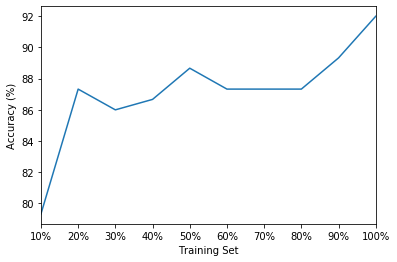

In [47]:
fig, ax = plt.subplots()
ax = df.iloc[:, 0].plot.line()
ax.set(xlabel= 'Training Set',
       ylabel= 'Accuracy (%)');

## Face Classification

We use the same distance metric that is calculated by comparing two images pixel by pixel for face classification as well. We initially choose k=7 for the number of neighbors for this model due to its efficacy in digit classification. We once again only took an average over three iterations due to the nature of KNN training and testing times, although we opted for a larger test set of size 150 since our training set of 451 data points is significantly less than the 5000 used in digit classification. Initially, our model only had an accuracy of 58.67% when trained upon the full training set. After looking through the image data again, we noticed that the deciding features of a face was far more consistent in the eye, nose, and mouth region. We decided to narrow the focus of our model to only the middle 25 x 30 pixel region and retrained our model accordingly. This time, our model's accuracy shot up to 74% from 58.67% trained on the full training set. The following dataframe shows the accuracy and time it takes to train and test our model for various divisions of our training set. Unlike the Naive Bayes model, this graph shows an unexpected decrease in accuracy when using 40% and 50% of the training set. This can be explained by taking a look at the standard deviations of the accuracy measurements between the first 10-30% training set iterations that tells us whether the mean accuracy measurement may have been influenced by outlier accuracy iterations. First, note that the standard deviations during the "accuracy dip" are 5.45% and 4.91% for 40% and 50% (training set partitions) respectively. Now compare those standard deviations to the standard deviations measured before the accuracy dip, which are 8.82%, 9.02% and 8.24%. This allows us to infer that the accuracy measurements before the accuracy dip may be assumedly higher than it should be and inflated by an outlier measurement during one of the iterations. The standard deviation starts to decrease around 70%, which makes sense that there is less variation as more of the training set is sampled, leading to a steady increase in accuracy from there onwards. Overall, the standard deviations range from 5% to a shocking 10% when using 60% or less of the training set, which can be explained by the fact that our method only ran three iterations per training set partition due to runtime restrictions. Looking at the time efficiency of our model, the average runtime per iteration is 10 minutes for a total of 5 hours over thirty iterations. This again supports our algorithm explanation how KNN needs to iterate through each training observation for each new test observation to find the K nearest neighbors.

In [38]:
pd = nb_setup.setup_pandas(escape_latex = True)
acc = []
acc_std = []
perf = []

for train_split in [round(0.1*i, 1) for i in range(1, 11)]:
    acc_tmp = []
    perf_tmp = []
    
    for j in range(3):
        perc_correct, performance = train_test_knn2(train_img_f, train_lbl_f_raw, test_img_f, test_lbl_f_raw,
                                                    img_ht=70, k=7, split=train_split, test_obs=150, seed=j)
        acc_tmp.append(perc_correct)
        perf_tmp.append(performance)
        if train_split == 1.0:
            break
    
    acc.append(round(np.mean(np.array(acc_tmp))*100, 2))
    acc_std.append(round(np.std(np.array(acc_tmp))*100, 2))
    perf.append(round(np.mean(np.array(perf_tmp)), 2))
    
df = pd.DataFrame(list(zip(acc, acc_std, perf)), columns = ['Mean(Accuracy) (%)', 'Std(Accuracy) (%)', 'Time (sec)'])
df.index = [str(round(10*i, 1)) + '%' for i in range(1, 11)]
df.index.name = 'Training'
df

,Mean(Accuracy) (%),Std(Accuracy) (%),Time (sec)
Training,,,
10%,56.89,8.82,161.53
20%,63.11,9.02,293.37
30%,66.22,8.24,411.93
40%,64.89,5.45,631.28
50%,63.11,4.91,713.95
60%,64.44,6.89,857.38
70%,67.56,3.00,1012.93
80%,69.78,2.06,902.04
90%,72.00,1.96,434.50


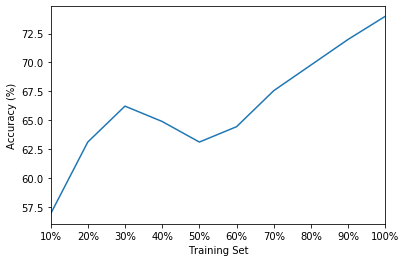

In [39]:
fig, ax = plt.subplots()
ax = df.iloc[:, 0].plot.line()
ax.set(xlabel= 'Training Set',
       ylabel= 'Accuracy (%)');